# **Defining the Question**

### **1. Problem Statement**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.


### **2. Objective of the research**



1.   To uncover the factors that affect acquaring a bank account
2.   Visualize the distribution of people with bank accounts across the East Africa.
3. predict which individuals are most likely to have or use a bank account






### **3. Defining Metric for Success***

At the end of this research, my solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


### **4. Recording the experimental design**



1.   Data Understanding

1.   Data Cleaning
2.   Exploratory Data Analysis


4.   Predictive Analysis

5.   Recommendation






# **Data understanding.**

In [157]:
## import  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
##loading our dataset
df=pd.read_csv('http://bit.ly/FinancialDataset')


In [159]:
## looking at the number of rows and columns
df.shape

(23524, 13)

In [160]:
### lets have a grimpse look at our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [161]:
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [162]:
## statistical information of the data
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [163]:
## data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


Our data contains 13 columns and 23524 rows. 10 out of the 13 columns are categorical data  and age and household size are float.

# **Data Cleaning**

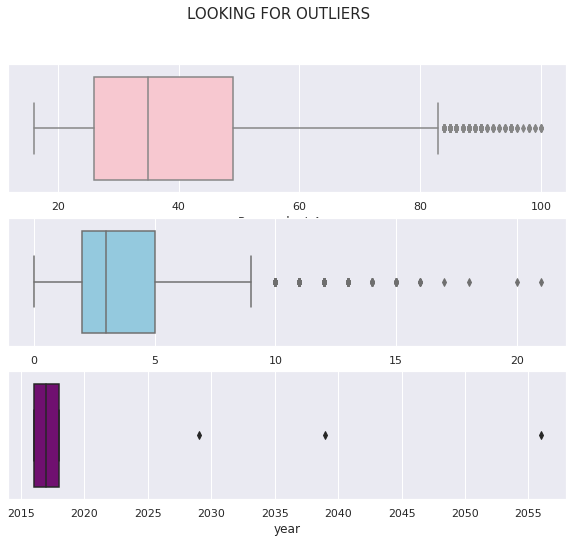

In [164]:
## looking for Outliers in household size and age
fig,((ax1,ax2,ax3))=plt.subplots(3,1,figsize=(10,8))
plt.suptitle('LOOKING FOR OUTLIERS',fontsize=(15))
sns.boxplot(df['Respondent Age'],color='pink',ax=ax1)
sns.boxplot(df['household_size'],color='skyblue',ax=ax2)
sns.boxplot(df['year'],color='purple',ax=ax3)
plt.show()

In [165]:
data=df

In [166]:
### dealing with outliers
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR =q3-q1
data = data[~((data < (q1 - 1.5 * IQR)) |(data > (q3 + 1.5 * IQR))).any(axis=1)]
data.shape
### we have removed our outliers

(22903, 13)

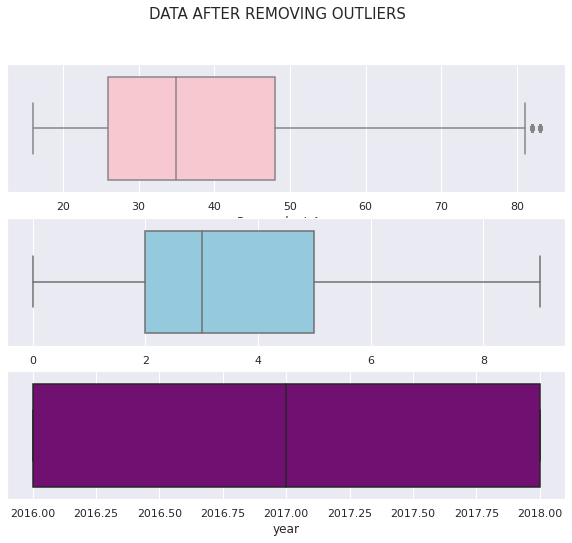

In [167]:
## looking for Outliers in household size and age
fig,((ax1,ax2,ax3))=plt.subplots(3,1,figsize=(10,8))
plt.suptitle('DATA AFTER REMOVING OUTLIERS',fontsize=(15),)
sns.boxplot(data['Respondent Age'],color='pink',ax=ax1)
sns.boxplot(data['household_size'],color='skyblue',ax=ax2)
sns.boxplot(data['year'],color='purple',ax=ax3)
plt.show()

Age, year and Household size had a very ouliers,looking at the 1st boxplots we can see. We have removed them using the IQR method.
lookig at our second boxplots we can see the variables do not have outliers.

In [ ]:
##Removing the Uniqueid column it will be un used in the analysis
data.columns
data=data.drop(['uniqueid'],axis=1)
data.shape

In [169]:
##looking and dealing with missing values
data.isnull().sum()

country                   14
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [170]:
# lets drop the null values.
data=data.dropna()
data.shape

(22725, 12)

In [171]:
##looking for duplicates
data.duplicated().value_counts()

False    18371
True      4354
dtype: int64

In [172]:
### dealing with duplicates
data=data.drop_duplicates()
data.shape

(18371, 12)

In [173]:
## rectifyng data input on 'level of education'
## we replacing the wrong input of '6' and replacing it with 'others/dont know/rta'
data['Level of Educuation'].unique()
data['Level of Educuation']=data['Level of Educuation'].str.replace('6','Other/Dont know/RTA')
data['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [174]:
## now we have clean data, 
data.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


The data is clean: I have removed the duplicates, Outliers, missing values and replaced wrong input of data. 

# **Exploratory Data Analysis**

In [212]:
#Number of people with bank accounts
accounts=data['Has a Bank account'].value_counts(normalize=False)
print('Number of bank accounts:-',accounts)

Number of bank accounts:- No     15301
Yes     3070
Name: Has a Bank account, dtype: int64


From the data set provided 15301 people did not have a bank account, only 3070 had in a sample size 18307. This means that over 80% of the population in East Africa did not have bank account.

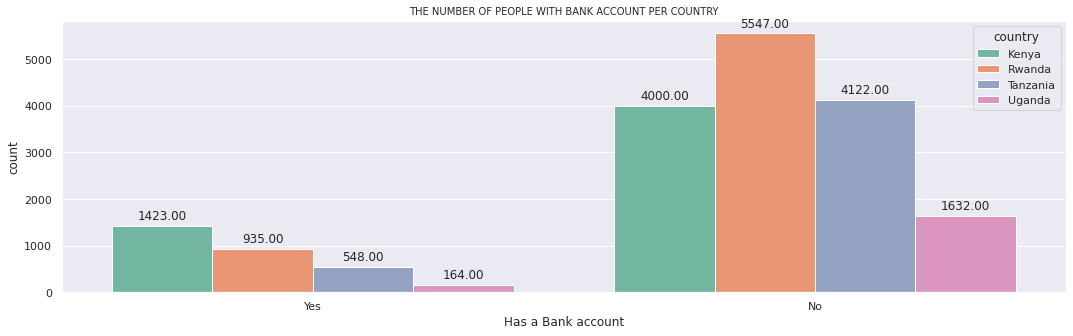

In [208]:
## How many people have a bank account in each country

fig, ax= plt.subplots(figsize=(18,5))
sns.set(style="darkgrid")
ax=sns.countplot(x=data['Has a Bank account'],hue=data['country'],palette='Set2')
ax.set_title('THE NUMBER OF PEOPLE WITH BANK ACCOUNT PER COUNTRY',fontsize=(10))
## adding values on the bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')

Looking at the side of people who do not have bank accounts,Rwanda has the highest number of people without accounts,followed by Tanzania & Kenya then Uganda has least number of people with no accounts. On the other hand Kenya had the highest number of  people with bank accounts.
I would recommend  that banks in Rwanda to motivate their people to open bank accounts and show them the benefits of owning a bank account.

In [177]:
## Respondent average age by country
tables=pd.pivot_table(data,values=['Respondent Age'],index=['country','Has a Bank account'],aggfunc='mean')
print(tables)


                             Respondent Age
country  Has a Bank account                
Kenya    No                       39.094250
         Yes                      40.894589
Rwanda   No                       40.203714
         Yes                      38.946524
Tanzania No                       38.278506
         Yes                      39.029197
Uganda   No                       35.500000
         Yes                      34.000000


The average age of people interviewed was between 34-40, hence this data didnt give enough information about the age of people with or without accounts across the region

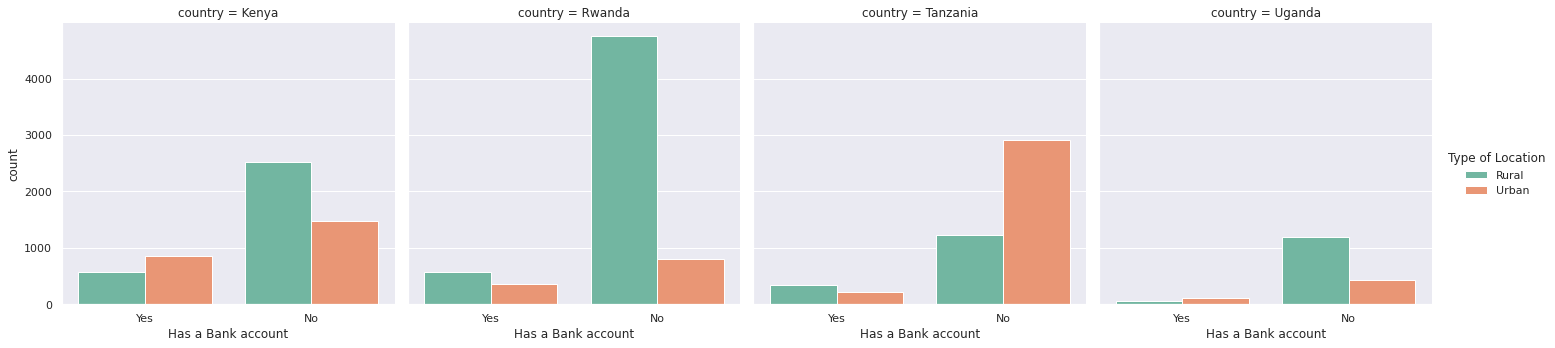

In [207]:
#Number of  Bank account in different locations Across East Africa
ax=sns.catplot(x='Has a Bank account',hue='Type of Location',col='country',kind='count',
            data=data,palette='Set2')


We can see from the  graph above that People in rurals areas do not have bank accounts. Tanzania is the only country that most of the urban people do not have accounts.

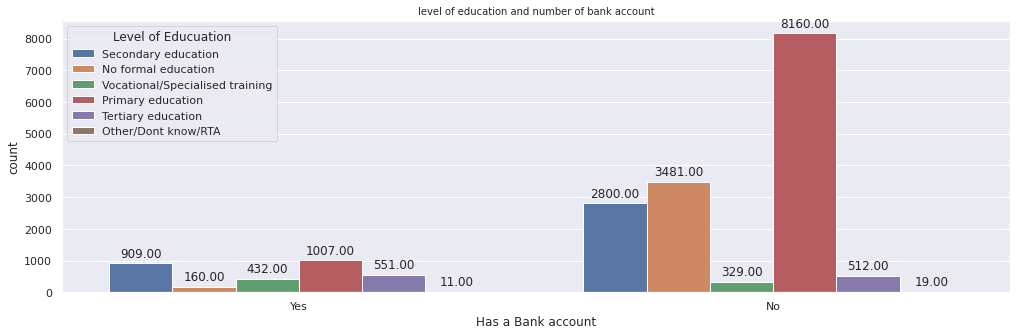

In [205]:
## Type of Jobs and has bank account
sns.choose_dark_palette
sns.set(style="darkgrid")
fig, ax= plt.subplots(figsize=(17,5))
sns.color_palette
ax=sns.countplot(data['Has a Bank account'],hue=data['Level of Educuation'],orient='h')
ax.set_title('level of education and number of bank account',fontsize=(10))
## adding values to our bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

From the graph above graph we can see that people who had a lower level of education did not have accounts. Most of the People who had a primary education and secondary education did not have accounts. On the other hand we had more people with higher learning  with accounts


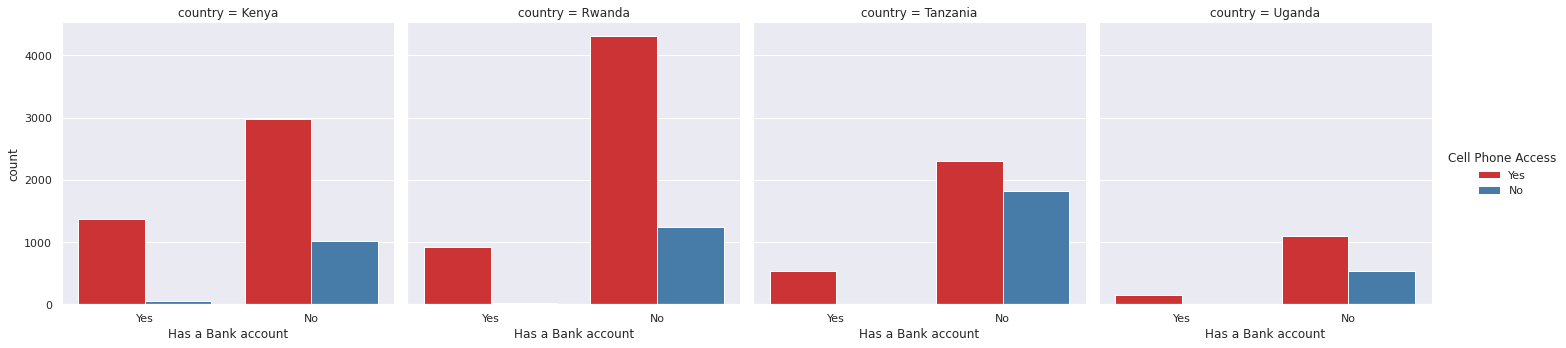

In [213]:
### having a cell phone and having a bank account
ax=sns.catplot(x='Has a Bank account',hue='Cell Phone Access',col='country',kind='count',
            data=data,palette='Set1')

people  who did not have cell phones did not have  bank accounts at all. across the East African region

To Do a correlation on multiple categorical data, We will first

In [181]:
## doing a label encoding.

from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])
data_encoded.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2,1,0,1,3,8,0,5,2,3,9
1,0,2,0,0,0,5,54,0,1,4,0,4
2,0,2,1,1,1,5,10,1,3,3,5,9
3,0,2,0,0,1,5,18,0,1,2,2,3
4,0,2,0,1,0,8,10,1,0,3,2,5


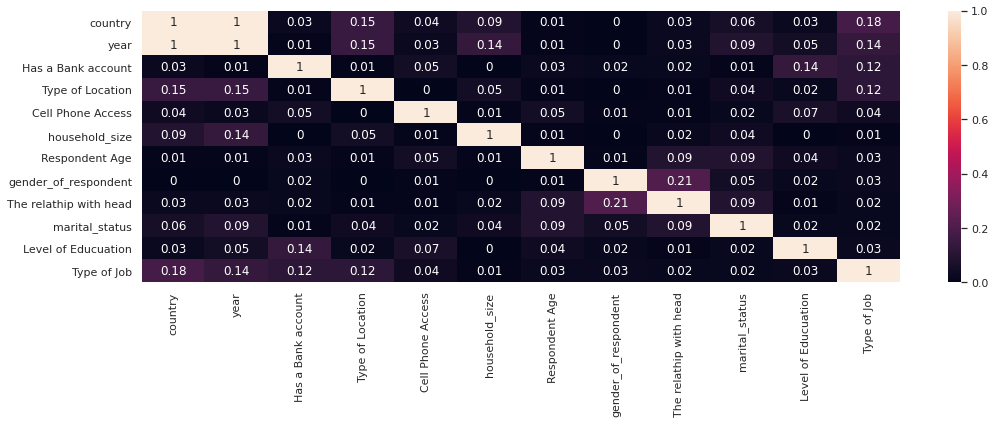

In [209]:

## Using Cramer V to Build a matrix that will help us calculate a correlation of our categorical data
from scipy.stats import chi2_contingency
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

####Building of the matrix
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df
### its not well demonstrated in figures lets plot it on a heatmat
fig, ax= plt.subplots(figsize=(17,5))
ax = sns.heatmap(df,annot=True)

plt.show()

# **Predictive Analysis**

In [192]:
## implementing a logit regression  to help us understand the features that help us predict the "has a bank account"
## diving our data into features and labels
x=data_encoded.drop(['Has a Bank account'],axis=1)
y=data_encoded['Has a Bank account']
import statsmodels.api as sm
logit=sm.Logit(y,x)
result=logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.391238
         Iterations 7
                            Results: Logit
Model:                Logit               Pseudo R-squared:  0.133     
Dependent Variable:   Has a Bank account  AIC:               14396.8538
Date:                 2020-08-21 11:12    BIC:               14482.8576
No. Observations:     18371               Log-Likelihood:    -7187.4   
Df Model:             10                  LL-Null:           -8290.4   
Df Residuals:         18360               LLR p-value:       0.0000    
Converged:            1.0000              Scale:             1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
country                -0.7320   0.0302 -24.1991 0.0000 -0.7913

In [203]:
### lets perform logistic regression to find  predict the people who would have a bank account given the following attributes
data_encoded

## spliting our data into test and training datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
### Normalization of the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

### To get a more accurate model it is prudent to reduce the features using PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=3)# we are reducing our dimensions from 12 features to 3 unrelated components
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
##performing a logistic regression classification
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
## Predicting the test set and measuring the accuracy
y_pred=log.predict(x_test)
## measuring the accuracy of the model
from sklearn.metrics import accuracy_score
print('accuracy:-',accuracy_score(y_pred,y_test))

accuracy:- 0.8300072568940493


# **Recommendation.**